<h1>Data Visualization</h1>

<strong>Library Imports</strong>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#importing sklearn
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

<strong>Data Imports and Cleaning</strong>

In [2]:
#politics
politics = pd.read_csv("../data/Politics_data_full.csv")
politics["published"] = politics["published"].str.slice_replace(3, 6, "")
politics["title_length"] = politics['title'].str.len()

#money
money = pd.read_csv("../data/Medium_Money_Data_final.csv")
money["published"] = money["published"].str.slice_replace(3, 6, "")
money["title_length"] = money['title'].str.len()

#art
art = pd.read_csv("../data/Medium_Articles_Art_Data.csv")
art["published"] = art["published"].str.slice_replace(3, 6, "")
art["title_length"] = art['title'].str.len()

<h2>Month vs Claps Data</h2>

<strong>Politics</strong>

In [ ]:
plt.figure(figsize=(16, 9))

pol_data1 = sns.pointplot(x="published", 
                          y="claps", 
                          data=politics, 
                          color = ".1")

pol_data1 = sns.stripplot(x="published", 
                          y="claps", 
                          data=politics, 
                          order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

pol_data1.set_title("Politics: Month vs Claps")
pol_data1.set_ylabel("Claps")
pol_data1.set_xlabel("Month")
sns.despine()

plt.show()

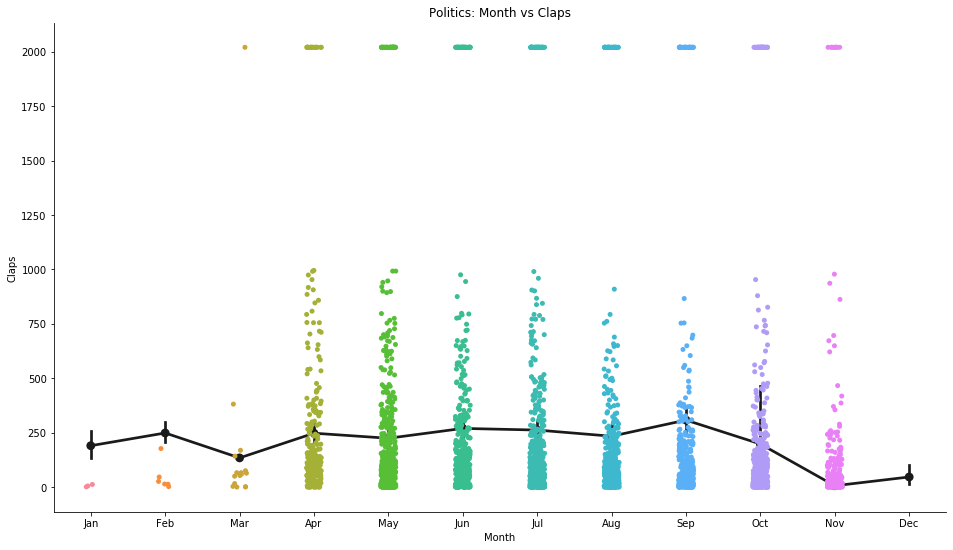

While most months seem to have similar clap averages, the average spikes in September likely because of election seasons, and dips after slowly because focus weens off of candidates.

<strong>Money</strong>

In [ ]:
plt.figure(figsize=(16, 9))

money_data1 = sns.pointplot(x="published", 
                            y="claps", 
                            data=money, 
                            color = ".1")

money_data1 = sns.stripplot(x="published", 
                            y="claps", 
                            data=money, 
                            order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

money_data1.set_title("Money: Month vs Claps")
money_data1.set_ylabel("Claps")
money_data1.set_xlabel("Month")
sns.despine()

plt.show()

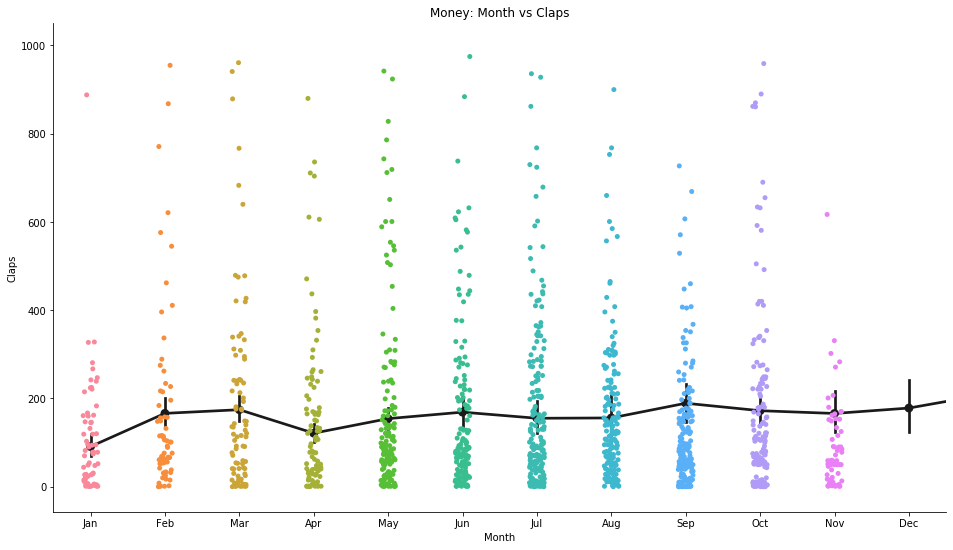

Once again, claps seem to have similar averages through months but the period between February and March is higher than others, potentially because this is when tax season is.

<strong>Art</strong>

In [ ]:
plt.figure(figsize=(16, 9))

art_data1 = sns.pointplot(x="published", 
                          y="claps", 
                          data=art, 
                          color = ".1")
art_data1 = sns.stripplot(x="published", 
                          y="claps", 
                          data=art, 
                          order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

art_data1.set_title("Art: Month vs Claps")
art_data1.set_ylabel("Claps")
art_data1.set_xlabel("Month")
sns.despine()

plt.show()

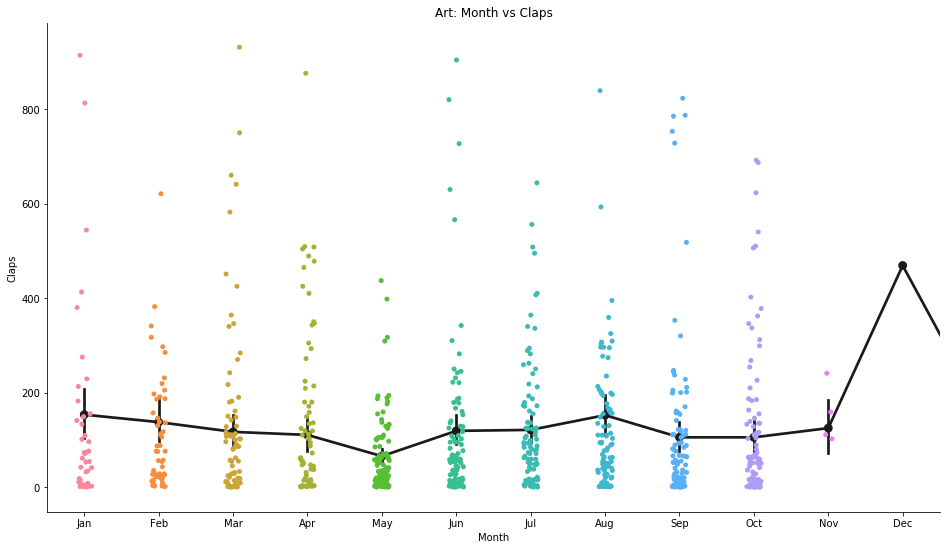

The averages through months are once again similar, with the exception of December due to an outlier data point. However, we see a rather sharp rise in average claps between the start of May through June, potentially because families could be planning a lot of visits to museums or other art galleries.

<h2>Title Length vs Claps Data</h2>

<strong>Politics</strong>

In [ ]:
pol_data2 = sns.jointplot("title_length", 
                          "claps", 
                          data=politics, 
                          kind="kde", 
                          space=0, 
                          color="r", 
                          height=5, 
                          ratio=5, 
                          ylim=(0,270), 
                          xlim=(10,80), 
                          dropna=True)

pol_data2.set_axis_labels("Title Length",
                          "Claps")

plt.show()

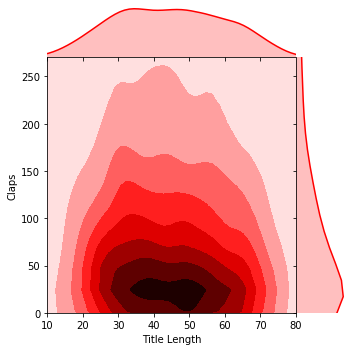

Most politics articles find themselves with titles between 35 and 55 characters and the claps seems to average between 10 and 40. 

<strong>Money</strong>

In [ ]:
money_data2 = sns.jointplot("title_length", 
                            "claps", 
                            data=money, 
                            kind="kde", 
                            space=0, 
                            color="g", 
                            height=5, 
                            ratio=5, 
                            ylim=(0,460), 
                            xlim=(10,80), 
                            dropna=True)

money_data2.set_axis_labels("Title Length", 
                            "Claps")

plt.show()

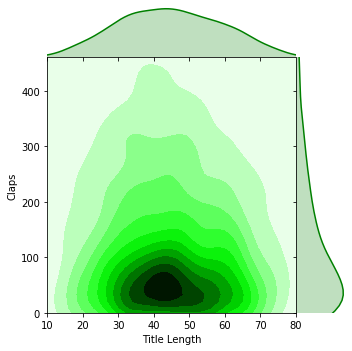

Most money articles find themselves with titles between 35 and 45 characters and the claps seems to average between 25 and 75. 

<strong>Art</strong>

In [ ]:
art_data2 = sns.jointplot("title_length", 
                          "claps", 
                          data=art, 
                          kind="kde", 
                          space=0, 
                          color="b", 
                          height=5, 
                          ratio=5, 
                          ylim=(0,270), 
                          xlim=(10,80), 
                          dropna=True)

art_data2.set_axis_labels("Title Length", 
                          "Claps")

plt.show()

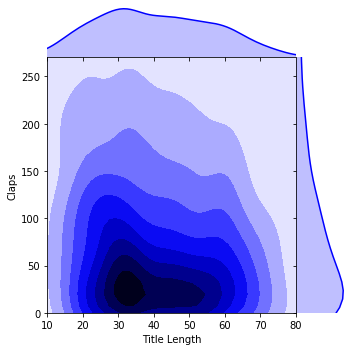

Most art articles find themselves with titles between 30 and 38 characters and the claps seems to average between 10 and 45. 

<h1>Decision Tree Classification and Modeling</h1>

In [6]:
#saving scraped data to pandas dataframes
politics = pd.read_csv("../data/Politics_data_full.csv", index_col = 0)
politics.text.replace('[]', np.nan, inplace=True)
politics = politics.dropna(subset=["text"]).reset_index(drop=True)

money = pd.read_csv("../data/Medium_Money_Data_Final.csv", index_col = 0)
money.text.replace("[]", np.nan, inplace=True)
money = money.dropna(subset=["text"]).reset_index(drop=True)

sports = pd.read_csv("../data/medium-sports-data.csv", index_col = 0)
sports.text.replace("[]", np.nan, inplace=True)
sports = sports.dropna(subset=["text"]).reset_index(drop=True)

tech = pd.read_csv("../data/medium-tech-data.csv", index_col = 0)
tech.text.replace("[]", np.nan, inplace=True)
tech = tech.dropna(subset=["text"]).reset_index(drop=True)

politics.text, money.text, sports.text, tech.text

(0       ['[Photo courtesy of Pixabay, There is a diffe...
 1       ['[image courtesy of Pixabay, Last night I was...
 2       ['[I can’t write about politics today. It’s to...
 3       ['[Lethal autonomous weapon systems (LAWS) are...
 4       ['[Photo courtesy of Pixabay, There is a diffe...
                               ...                        
 3328    ['[Candace Owens, an African-American commenta...
 3329    ['[Byrne Hobart makes some interesting points ...
 3330    ['[If karma were to exist, it’s hard to imagin...
 3331    ['[I’ve written before about potentially fatal...
 3332    ['[Migration scored with film audiences in 201...
 Name: text, Length: 3333, dtype: object,
 0       ['[Potential ways to Save using a Free Library...
 1       ['[By Tara Lachapelle, Netflix Inc. broke the ...
 2       ['[By Noah Smith, The great irony of the ironi...
 3       ['[By Faye Flam, It’s become a kind of sport t...
 4       ['[The Apple Card, a collaborative product bet...
              

<h2>NLP</h2>

In [7]:
#down sample
np.random.seed = 42
pol = politics.sample(2000, replace= False)[["text"]].reset_index(drop=True)
mon = money.sample(len(money), replace = False)[["text"]].reset_index(drop=True)
spo = sports.sample(len(sports), replace = False)[["text"]].reset_index(drop=True)
tec = tech.sample(2000, replace = False)[["text"]].reset_index(drop=True)

In [8]:
#adding on the labels:
pol["label"] = [0] * len(pol)
mon["label"] = [1] * len(mon)
spo["label"] = [2] * len(spo)
tec["label"] = [3] * len(tec)

In [9]:
#need to split them up to train and test
len_mon = len(mon)
len_pol = len(pol)
len_tec = len(tec)
len_spo = len(spo)

In [10]:
#need to get train set
len_train_mon = int(len_mon * .80)
len_train_pol = int(len_pol * .80)
len_train_tec = int(len_tec * .80)
len_train_spo = int(len_spo * .80)

In [11]:
#train sets
train_mon = mon.iloc[:len_train_mon]
train_pol = pol.iloc[:len_train_pol]
train_tec = tec.iloc[:len_train_tec]
train_spo = spo.iloc[:len_train_spo]

#test sets
test_mon = mon.iloc[len_train_mon:]
test_pol = pol.iloc[len_train_pol:]
test_tec = tec.iloc[len_train_tec:]
test_spo = spo.iloc[len_train_spo:]

In [12]:
#need to combine all categories together for train
train = pd.concat([train_mon, train_pol, train_tec, train_spo],axis=0)

#need to combine all categories together for test
test = pd.concat([test_mon, test_pol, test_tec, test_spo],axis=0)

In [13]:
train = train.sample(frac = 1, replace = False).reset_index(drop=True)
test = test.sample(frac = 1, replace = False).reset_index(drop=True)

In [14]:
#get rid of null values
train = train[~pd.isnull(train["text"])]
test = test[~pd.isnull(test["text"])]

<h2>Hyperparameter Tuning</h2>

In [ ]:
#dict to keep my results:
tuning_dict = {}
i = 0

#making vectorizer:
vector = tfidf(stop_words = "english", strip_accents = 'ascii', max_features = 100)

#a makeshift gridsearch:
for max_depth_i in range(1, 26):
    for min_samples_split_i in np.arange(.01, 0.26, .01):
        i = i + 1
        print(i)
        
        #this is how you create a basic decision tree
        dt = DecisionTreeClassifier(max_depth = max_depth_i, min_samples_split = min_samples_split_i)


In [ ]:
        #cross validation:
        kfold = KFold(n_splits = 3)
        for train_index, test_index in kfold.split(train):
            #split into train and test:
            X_train, X_test = train["text"].iloc[train_index], train['text'].iloc[test_index]
            Y_train, Y_test = train["label"].iloc[train_index], train['label'].iloc[test_index]

            #fit vectorizer on the train data:
            X_train_trans = vector.fit_transform(X_train)

            #DO NOT refit it onto the test data!
            X_test_trans = vector.transform(X_test)

            #fit on the decision tree
            dt.fit(X_train_trans, Y_train)
            test_scores = dt.score(X_test_trans, Y_test)
            train_scores = dt.score(X_train_trans, Y_train)

            #add to the dictionary

            tuning_dict[i] = {
                "train": np.mean(train_scores), 
                "test": np.mean(test_scores), 
                "max_depth": max_depth_i, 
                "min_samples_split": min_samples_split_i
            }

In [12]:
tuning_dict

{1: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.01},
 2: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.02},
 3: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.03},
 4: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.04},
 5: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.05},
 6: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.060000000000000005},
 7: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.06999999999999999},
 8: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,
  'max_depth': 1,
  'min_samples_split': 0.08},
 9: {'train': 0.44515832950894907,
  'test': 0.4593850390087196,


In [13]:
tuning_table = pd.DataFrame.from_dict(tuning_dict)

In [18]:
tuning_table_t = tuning_table.transpose().sort_values("train", ascending=False)
md = tuning_table_t["max_depth"].iloc[0]
mss = tuning_table_t["min_samples_split"].iloc[0]
tuning_table.transpose()

,train,test,max_depth,min_samples_split
1,0.445158,0.459385,1.0,0.01
2,0.445158,0.459385,1.0,0.02
3,0.445158,0.459385,1.0,0.03
4,0.445158,0.459385,1.0,0.04
5,0.445158,0.459385,1.0,0.05
...,...,...,...,...
621,0.775815,0.733364,25.0,0.21
622,0.775815,0.733364,25.0,0.22
623,0.761358,0.725562,25.0,0.23
624,0.761358,0.725562,25.0,0.24


In [16]:
#optimized decision tree
dt = DecisionTreeClassifier(max_depth = md, min_samples_split = mss)

In [17]:
#final vector written here (no max number of features)
vector = tfidf(stop_words = "english", strip_accents = 'ascii', max_features = None)

#fit the tfidf on all the train data:
train_final = vector.fit_transform(train["text"])

#the final transformation and fitting before using the test data:
test_final = vector.transform(test["text"])

In [18]:
#fit model on FULL train data
dt.fit(train_final, train["label"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
#score it on the test data
final_score = dt.score(test_final, test["label"])

#the final score
final_score

0.8311926605504587

<h2>Confusion Matrix</h2>

In [31]:
#get predictions from the decision tree
predictions = dt.predict(test_final)
predictions

array([0, 3, 1, ..., 2, 3, 3], dtype=int64)

In [32]:
#creating a function to normalize the confusion marix:
#used sklearn docs for the labels and axis!

def normed_cm(real, predictions):
    """Majority of code from:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    to make a confusion matrix, given real labels and predicted labels"""
    
    #get the confusion matrix:
    cm = confusion_matrix(real, predictions)
    
    #normalized
    normed = []
    for row in np.arange(4):
         normed.append(cm[row]/sum(cm[row]))
    cm = np.array(normed)

    #axis and labels:
    fig, ax = plt.subplots()
    classes = ["politics", "money", "sports", "tech"]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title="Comparing Class Classification",
               ylabel='True label',
               xlabel='Predicted label');

In [ ]:
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

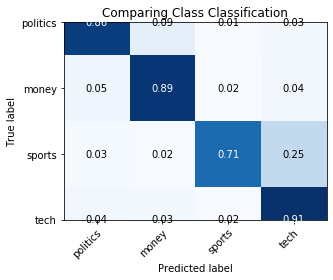

In [33]:
normed_cm(test["label"], predictions)